# Real or Not? NLP with Disaster Tweets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Ingestion

#### Importing and exploring training set

In [2]:
#Read in training set
train = pd.read_csv('train.csv')

#Summary of training set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
#View first 5 entries in training set
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
#View last 5 entries in training set
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [5]:
#View numbers of missing values
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
#Check for duplicates
train.duplicated().sum()

0

#### Importing and exploring test data set

In [7]:
#Read in test set
test = pd.read_csv('test.csv')

#Summary of test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
#View first 5 entries in test set
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
#View last 5 entries in test set
test.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [10]:
#View numbers of missing values
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

### Exploratory Data Analysis

#### Further exploration of the data sets

In [11]:
#Viewing tweets that were labeled as non-disastrous
train[train['target'] == 0]

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [12]:
#Taking a closer look at index entry 7582 with keyword record 'wrecked'
train.iloc[7582].text

"Cramer: Iger's 3 words that wrecked Disney's stock - CNBC http://t.co/N6RBnHMTD4"

By observing the data above, these tweets were not associated with a disaster. However, index entry 7582 had keyword record 'wrecked'. By taking a closer look, the term 'wrecked' was used metaphorically to describe the plummetting of Disney stocks, not a disaster incident like a car wreck.

In [13]:
#Viewing tweets that were labeled as disastrous
train[train['target'] == 1]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [14]:
#Viewing the first tweet in full
train['text'].values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

The data above are tweets that are affiliated with disasters. The first entry is about an earthquake and the second entry is a forest fire. 

In [15]:
#Number of unique values for location
train['location'].nunique()

3341

In [16]:
#Viewing least frequent used locations for train set
train['location'].value_counts()[3000:]

 Blood Indian Reserve             1
17th Dimension                    1
 Somewhere.                       1
West Vancouver, B.C.              1
My contac 27B80F7E 08170156520    1
                                 ..
Bug Forest                        1
Fort Collins, CO                  1
w. Nykae                          1
Fairy Tail!                       1
The Peach State                   1
Name: location, Length: 341, dtype: int64

In [17]:
#Viewing most frequent used locations for train set
train['location'].value_counts()[:100]

USA              104
New York          71
United States     50
London            45
Canada            29
                ... 
Asheville, NC      5
Wisconsin          5
Pakistan           5
Cleveland, OH      5
Pennsylvania       5
Name: location, Length: 100, dtype: int64

In [18]:
#Viewing least frequent used locations for test set
test['location'].value_counts()[1000:]

Saint John, N.B, Canada     1
upstate NY                  1
usa                         1
Kentucky                    1
Tri-State                   1
                           ..
Cheltenham                  1
28.709672,-97.376514        1
Kurdistan                   1
Harlem                      1
Tampa Bay                   1
Name: location, Length: 602, dtype: int64

In [19]:
#Viewing most frequent used locations for test set
test['location'].value_counts()[:100]

New York                       38
USA                            37
Worldwide                      16
United States                  15
London                         13
                               ..
china                           2
Alaska, USA                     2
France                          2
Dubai, United Arab Emirates     2
MAD as Hell                     2
Name: location, Length: 100, dtype: int64

### Data visualization

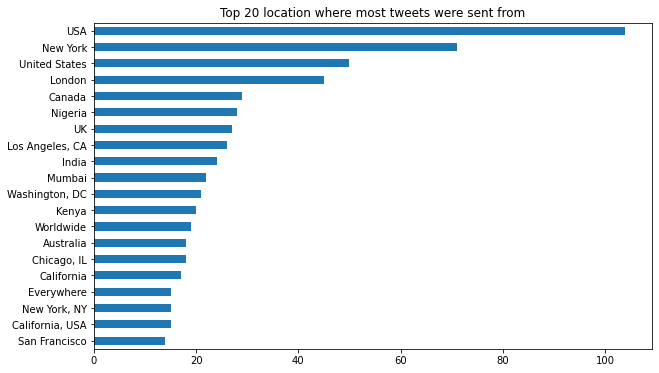

In [20]:
#Viewing the top 20 frequently used location
train.location.value_counts()[:20].sort_values().plot(kind = 'barh', figsize = (10, 6))
plt.title('Top 20 location where most tweets were sent from')
plt.show();

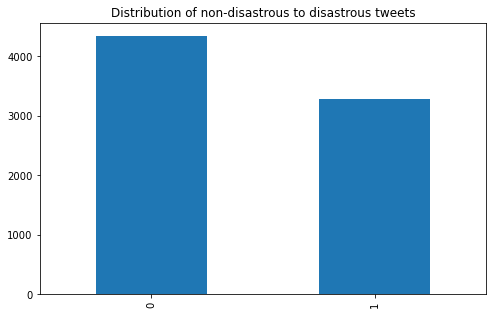

In [21]:
#Viewing distribution of non-disastrous vs. disastrous tweets
train['target'].value_counts().plot(kind = 'bar', figsize = (8, 5))
plt.title('Distribution of non-disastrous to disastrous tweets')
plt.show();

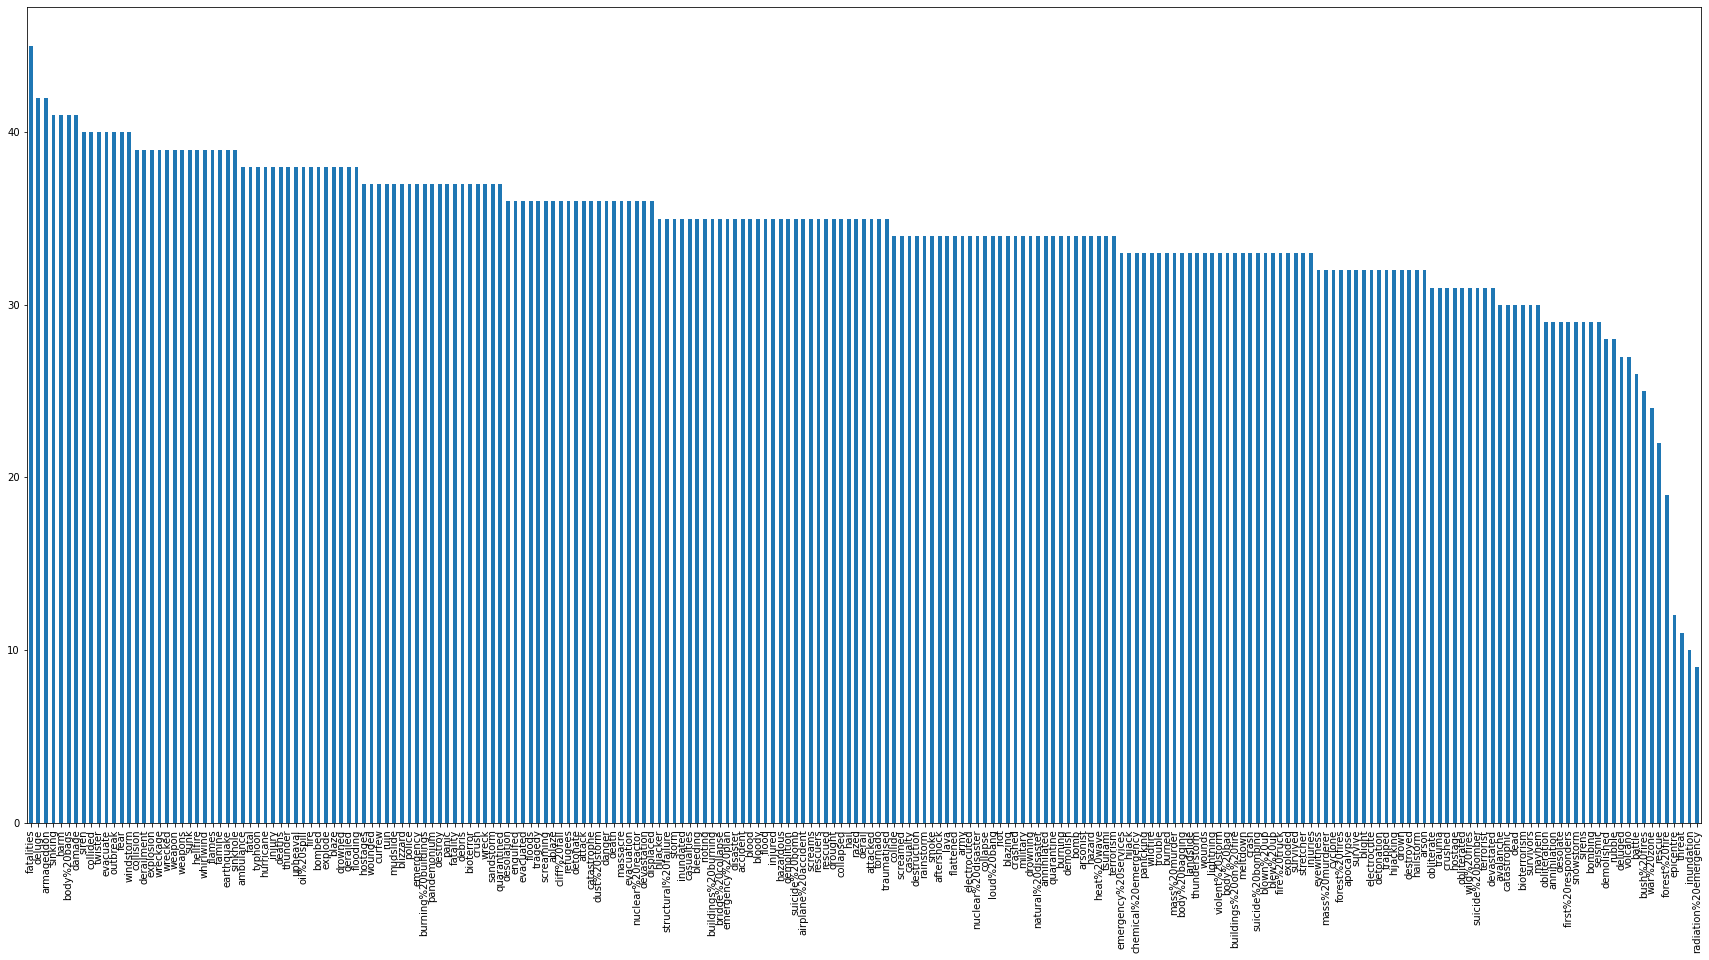

In [22]:
#Viewing the distribution of keywords
fig = plt.figure(figsize = (30, 15))

train.keyword.value_counts().plot(kind = 'bar')
plt.show();

### Data cleaning and preparation

In [23]:
#Appending train and test sets 
df = train.append(test, sort = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10876 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        10876 non-null  int64  
 1   keyword   10789 non-null  object 
 2   location  7238 non-null   object 
 3   text      10876 non-null  object 
 4   target    7613 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 509.8+ KB


In [24]:
#Checking for duplicate entries from train and test sets
df.duplicated().sum()

0

In [25]:
#Dropping location attribute due to high amount of nulls and random locations
df.drop('location', axis = 1, inplace = True)

In [26]:
#Removing URLs
import re
df['text'] = df['text'].apply(lambda x: re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', x, flags = re.MULTILINE))

In [27]:
#Removing puncuations
df['text'].replace('[^\w\s]', '', regex = True, inplace = True)

In [28]:
df['text']

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTEN...
3259    Storm in RI worse than last hurricane My citya...
3260                    Green Line derailment in Chicago 
3261            MEG issues Hazardous Weather Outlook HWO 
3262    CityofCalgary has activated its Municipal Emer...
Name: text, Length: 10876, dtype: object

#### Feature Engineering

In [29]:
#Adding word count of each tweet as an attribute
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [30]:
df.head()

,id,keyword,text,target,word_count
0,1,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0,13
1,4,NaN,Forest fire near La Ronge Sask Canada,1.0,7
2,5,NaN,All residents asked to shelter in place are be...,1.0,22
3,6,NaN,13000 people receive wildfires evacuation orde...,1.0,8
4,7,NaN,Just got sent this photo from Ruby Alaska as s...,1.0,16


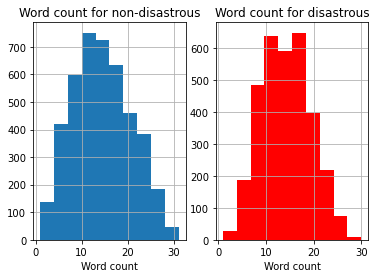

In [31]:
#Viewing the word count distribution for non-disastrous vs. disastrous tweets
nd = df[df['target'] == 0]
d = df[df['target'] == 1]

#Graphing the histogram for word counts for non-disastrous vs. disastrous tweets
plt.subplot(121)
nd['word_count'].hist()
plt.title('Word count for non-disastrous')
plt.xlabel('Word count')

plt.subplot(122)
d['word_count'].hist(color= 'r')
plt.title('Word count for disastrous')
plt.xlabel('Word count')

plt.show();

In [32]:
import nltk

#Adding tokenized text as an attribute
df['tokenized'] = df['text'].apply(lambda x: nltk.word_tokenize(x.lower()))

In [33]:
from textblob import TextBlob, Word
from nltk.corpus import stopwords

#List of stopwords
stop_words = list(stopwords.words('english'))
print (stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
#Removing stopwords and adding new lists as attribute
df['stopwords_removal'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

In [35]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

#Lemmatizing and Stemming lists of words and adding new lists as attribute
df['lem_stem'] = df['stopwords_removal'].apply(lambda x: [Word(w).lemmatize() for w in x])
df['lem_stem'] = df['lem_stem'].apply(lambda x: [PorterStemmer().stem(w) for w in x])

In [36]:
#Adding subjectivity and polarity of tweets as new attributes
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [37]:
df.head(10)

,id,keyword,text,target,word_count,tokenized,stopwords_removal,lem_stem,subjectivity,polarity
0,1,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0,13,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, u]",0.0000,0.00000
1,4,NaN,Forest fire near La Ronge Sask Canada,1.0,7,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]",0.4000,0.10000
2,5,NaN,All residents asked to shelter in place are be...,1.0,22,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...",0.3875,-0.01875
3,6,NaN,13000 people receive wildfires evacuation orde...,1.0,8,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...",0.0000,0.00000
4,7,NaN,Just got sent this photo from Ruby Alaska as s...,1.0,16,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...",0.0000,0.00000
5,8,NaN,RockyFire Update California Hwy 20 closed in ...,1.0,16,"[rockyfire, update, california, hwy, 20, close...","[rockyfire, update, california, hwy, 20, close...","[rockyfir, updat, california, hwi, 20, close, ...",0.2375,-0.11250
6,10,NaN,flood disaster Heavy rain causes flash floodin...,1.0,14,"[flood, disaster, heavy, rain, causes, flash, ...","[flood, disaster, heavy, rain, causes, flash, ...","[flood, disast, heavi, rain, caus, flash, floo...",0.5000,-0.20000
7,13,NaN,Im on top of the hill and I can see a fire in ...,1.0,15,"[im, on, top, of, the, hill, and, i, can, see,...","[im, top, hill, see, fire, woods]","[im, top, hill, see, fire, wood]",0.5000,0.50000
8,14,NaN,Theres an emergency evacuation happening now i...,1.0,12,"[theres, an, emergency, evacuation, happening,...","[theres, emergency, evacuation, happening, bui...","[there, emerg, evacu, happen, build, across, s...",0.0000,0.00000
9,15,NaN,Im afraid that the tornado is coming to our area,1.0,10,"[im, afraid, that, the, tornado, is, coming, t...","[im, afraid, tornado, coming, area]","[im, afraid, tornado, come, area]",0.9000,-0.60000


In [38]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [39]:
vect = CountVectorizer()

#Joining list of words in attribute lem-stem into a string for count vectorizing
df['lem_stem'] = df['lem_stem'].apply(lambda x: ' '.join(x))

In [40]:
#Getting frequency count of words in tweets using count vectorizer
count_vect = vect.fit_transform(df['lem_stem'])

In [41]:
count_vect.shape

(10876, 18821)

In [42]:
#Printing list of words from count vectorizing
print (vect.vocabulary_)

{'deed': 4803, 'reason': 13572, 'earthquak': 5528, 'may': 10542, 'allah': 1400, 'forgiv': 6590, 'forest': 6583, 'fire': 6395, 'near': 11455, 'la': 9569, 'rong': 14083, 'sask': 14403, 'canada': 3295, 'resid': 13808, 'ask': 1871, 'shelter': 14814, 'place': 12795, 'notifi': 11796, 'offic': 11976, 'evacu': 5963, 'order': 12177, 'expect': 6036, '13000': 167, 'peopl': 12584, 'receiv': 13594, 'wildfir': 18098, 'california': 3244, 'got': 7199, 'sent': 14656, 'photo': 12698, 'rubi': 14187, 'alaska': 1328, 'smoke': 15186, 'pour': 12970, 'school': 14493, 'rockyfir': 14034, 'updat': 17352, 'hwi': 8152, '20': 320, 'close': 3881, 'direct': 5066, 'due': 5438, 'lake': 9594, 'counti': 4280, 'cafir': 3210, 'flood': 6489, 'disast': 5085, 'heavi': 7699, 'rain': 13431, 'caus': 3465, 'flash': 6453, 'street': 15743, 'manit': 10374, 'colorado': 4012, 'spring': 15498, 'area': 1750, 'im': 8324, 'top': 16787, 'hill': 7835, 'see': 14597, 'wood': 18232, 'there': 16458, 'emerg': 5714, 'happen': 7542, 'build': 3074,

In [43]:
#TFIDF Vectorize tweets
t_vect = TfidfVectorizer()
tfidf_vect = t_vect.fit_transform(df['lem_stem'])

In [44]:
#Get TFIDF vectorized sparse matrix into a dataframe
tf_df = pd.DataFrame(tfidf_vect.toarray(), columns = vect.get_feature_names())
tf_df

,00,0011,001116,0025,005225,010156,010217,010242,0104,010401,...,ûïymcglaun,ûïyou,ûïû,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókodi,ûûif
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.257271,0.0,0.0,0.0,0.0,0.0,0.0
10872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
10873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
10874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#Get count vectorized sparse matrix into a dataframe
cv_df = pd.DataFrame(count_vect.toarray(), columns = vect.get_feature_names())
cv_df

,00,0011,001116,0025,005225,010156,010217,010242,0104,010401,...,ûïymcglaun,ûïyou,ûïû,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókodi,ûûif
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Renaming target attribute to target_x in case there is an attribute for target words in tweets
df.rename(columns = {'target':'target_x'}, inplace = True)
df.reset_index(inplace = True)

In [47]:
#Merge the dataframe with count vectorized sparse matrix
df_2 = pd.concat([df, cv_df], axis = 1)

In [48]:
#Turn count vectorizer of tweets into sparse matrix
#cv = count_vect.todense()

In [49]:
#Dropping unnecessary attributes
df_2.drop(['keyword','text', 'tokenized', 'stopwords_removal', 'lem_stem'], axis = 1, inplace = True)

### Data preparation for model

In [50]:
#Splitting the train and test sets
train =cv_df[:7613]
test = cv_df[7613:]

In [51]:
train.head()

,00,0011,001116,0025,005225,010156,010217,010242,0104,010401,...,ûïymcglaun,ûïyou,ûïû,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókodi,ûûif
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#Assigning the sparse matrix from count vectorizer in variable x and target in variable y
x = train
y = df_2['target_x'][:7613]

In [53]:
print (x.shape)
print (y.shape)

(7613, 18821)
(7613,)


### Training models

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

In [55]:
#Train-test split with 20% reserved for test validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [56]:
#These are the chosen algorithms for training
log = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators = 200)
gbc = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 200, max_depth = 5)
xgb = XGBClassifier()

In [60]:
algorithms = [log, dtc, rfc, gbc, xgb]
names = ['log', 'dtc', 'rfc', 'gbc', 'xgb']

In [61]:
#Function to train models with the chosen algorithms and to output performance scores from each algorithm
def classification():
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    for a in range(len(algorithms)):
        algorithms[a].fit(x_train, y_train)
    
    for a in range(len(algorithms)):
        accuracy.append(accuracy_score(y_test, algorithms[a].predict(x_test)))
        precision.append(precision_score(y_test, algorithms[a].predict(x_test)))
        recall.append(recall_score(y_test, algorithms[a].predict(x_test)))
        f1.append(f1_score(y_test, algorithms[a].predict(x_test)))
        
    met = pd.DataFrame(index = names, columns = ['Accuracy', 'Precision', 'Recall', 'F1'])
    met['Accuracy'] = accuracy
    met['Precision'] = precision
    met['Recall'] = recall
    met['F1'] = f1
    return met

In [62]:
#Trained and presented scores for each chosen algorithm
classification()

C:\Users\Kimberly\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:37:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Precision,Recall,F1
log,0.789888,0.798261,0.692308,0.741519
dtc,0.749836,0.731148,0.672700,0.700707
rfc,0.791202,0.833656,0.650075,0.730508
gbc,0.705844,0.893773,0.368024,0.521368
xgb,0.780039,0.833333,0.618401,0.709957


### Predicting test set

In [63]:
#Using logistic regression to predict test set since logistic regression presented with higher F1 score
y_pred = log.predict(test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [64]:
#Creating dataframe with the id from test set
test_pred = pd.DataFrame(data = df['id'][7613:], columns = ['id'])

In [65]:
#Added predicted targets to dataframe for submitting
test_pred['target'] = y_pred
test_pred.head()

,id,target
7613,0,1.0
7614,2,1.0
7615,3,1.0
7616,9,1.0
7617,11,1.0


In [66]:
#Converting dtype of target from float to integer
test_pred['target'] = test_pred['target'].astype('int')

In [67]:
#Export dataframe of results as csv
test_pred.to_csv('NLP_results_2.csv', index = False)